# **MINI CHALLENGE**

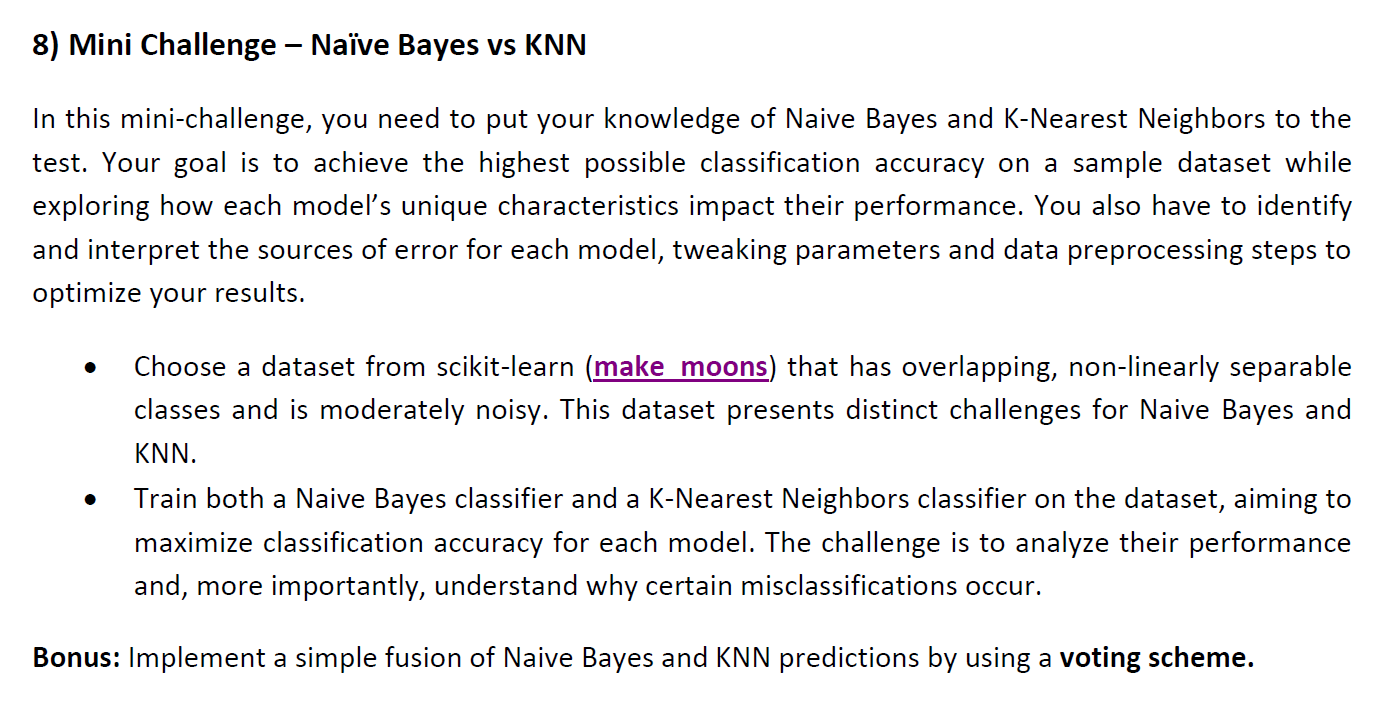

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons


Generating a dataset of 50000 samples with a noise of 50%. The samples are shuffled and random_state = 42

In [ ]:
X, y = make_moons(n_samples=50000, noise=0.5, shuffle = True, random_state=42)

### **Understanding The Dataset**

In [ ]:
X.shape

(50000, 2)

In [ ]:
y.shape

(50000,)

In [ ]:
# converting X and y into dataframes
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [ ]:
df_X.head()


,0,1
0,0.847589,-0.110473
1,-0.066123,1.231823
2,0.359589,-0.125668
3,0.765201,1.298790
4,1.210952,-0.540914


In [ ]:
df_y.head()

,0
0,1
1,0
2,0
3,0
4,1


In [ ]:
df_X.describe()

,0,1
count,50000.000000,50000.000000
mean,0.503142,0.247389
std,1.000989,0.702390
min,-2.583984,-2.467415
25%,-0.213578,-0.251209
50%,0.498063,0.245785
75%,1.219491,0.746063
max,3.564212,2.817290


In [ ]:
df_y.describe()

,0
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


## **NAIVE BAYES**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [ ]:
# Train the model on the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict on the test data
y_pred = gnb.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display the confusion matrix for a detailed performance view
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8058666666666666
Confusion Matrix:
 [[6083 1485]
 [1427 6005]]


## **Conclusion For Naive Bayes**

Based on the Naive Bayes classification applied to the "make_moons" dataset with 50,000 samples, the model achieved an accuracy of approximately 80.59%. The confusion matrix indicates a balanced performance, with 6083 true negatives, 6005 true positives, 1485 false positives, and 1427 false negatives. This implies that the model correctly classified a large proportion of the samples in both classes, though it also shows a notable number of misclassifications in each class.

Given the nonlinear and overlapping nature of the "make_moons" dataset, which includes noise, the Naive Bayes algorithm demonstrates relatively strong performance in capturing patterns within the data despite its limitations with nonlinear boundaries. This result showcases Naive Bayes as a simple yet effective classifier for noisy datasets, though more complex models might further improve accuracy by better handling non-linear separations in the data.

## **KNN**

### **Training The Model For Different Values Of k**

In [ ]:
import matplotlib.pyplot as plt

# Define the values of k to test
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 41]

# Dictionary to store accuracy for each k
knn_accuracies = []

# Iterate over each value of k
for k in k_values:
    # Initialize the KNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model
    knn.fit(X_train, y_train)
    # Make predictions
    knn_pred = knn.predict(X_test)
    # Calculate accuracy and add it to the list
    accuracy = accuracy_score(y_test, knn_pred)
    knn_accuracies.append(accuracy)
    print(f"KNN Accuracy with k={k}: {accuracy}")



KNN Accuracy with k=3: 0.7874
KNN Accuracy with k=5: 0.7990666666666667
KNN Accuracy with k=7: 0.8039333333333334
KNN Accuracy with k=9: 0.8043333333333333
KNN Accuracy with k=11: 0.8071333333333334
KNN Accuracy with k=13: 0.8101333333333334
KNN Accuracy with k=15: 0.8111333333333334
KNN Accuracy with k=17: 0.8119333333333333
KNN Accuracy with k=19: 0.8116666666666666
KNN Accuracy with k=21: 0.8116
KNN Accuracy with k=23: 0.8133333333333334
KNN Accuracy with k=25: 0.8137333333333333
KNN Accuracy with k=27: 0.8142
KNN Accuracy with k=29: 0.8138
KNN Accuracy with k=31: 0.8150666666666667
KNN Accuracy with k=33: 0.8157333333333333
KNN Accuracy with k=41: 0.8159333333333333


### **Plotting The Relationship Between Accuracy And K Values**

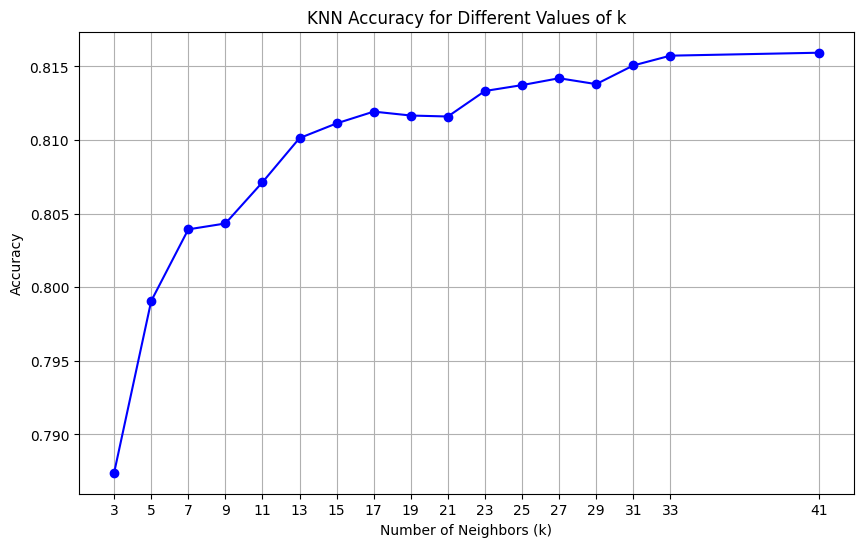

In [ ]:
# Plot accuracy vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### **Analyzing the Graph**


The "make_moons" dataset, generated with a noise stage of 0.5, introduces substantial overlap among classes, hard the KNN classifier`s overall performance.

1. **Sensitivity to Noise at Low ( k )**: With small  k values, the KNN classifier is distinctly touchy to neighborhood noise, as predictions depend on only some close by points. This ends in decrease accuracy (~0.79) because of misclassification due to noisy points.

2. **Improvement with Higher ( k )**: As k  increases, accuracy rises to ~0.81, as averaging over extra friends reduces the effect of noise. This makes predictions extra strong and much less stricken by random fluctuations withinside the data.

3. **Optimal ( k ) Range**: Between 13 and 41, accuracy stabilizes round 0.815. This variety affords a stability wherein the version is strong to noise however nonetheless captures magnificence distinctions.

4. **Over-smoothing at Very High ( k )**: With very high k values (31 to 41), accuracy stabalizes. Although noise is mitigated, immoderate averaging dangers blurring the magnificence boundaries.


### **Finding The Average Accuracy**

In [ ]:
# find average accuracy
average_accuracy = sum(knn_accuracies) / len(knn_accuracies)
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.8094196078431373


### **Dealing With Misclassifications Using k= 41**

#### **The challenge is to analyze their performance and, more importantly, understand why certain misclassifications occur.**

#### **Analyzing the Misclassifications**
1. **Confusion Matrix**: Identify which classes are most frequently confused to see if specific types of errors are recurring.

2. **Feature Contribution (SHAP or LIME)**: Analyze misclassified instances by examining the influence of individual features. This helps identify which features might be misleading the model.

3. **Prediction Confidence**: Review confidence scores for misclassifications. High-confidence errors may suggest overfitting, while low-confidence errors can indicate ambiguity.

4. **Cluster Analysis of Misclassifications**: Use clustering on misclassified samples to see if they form patterns that could explain the confusion, such as similar feature profiles.

5. **Data Quality Check**: Ensure there are no labeling errors or data inconsistencies, which could lead to unavoidable misclassifications.

6. **Targeted Data Augmentation or Rebalancing**: For frequently misclassified classes, consider adding more samples or rebalancing the dataset to improve model differentiation.


KNN Accuracy with k=41: 0.8159333333333333
Confusion Matrix:
 [[6214 1354]
 [1407 6025]]


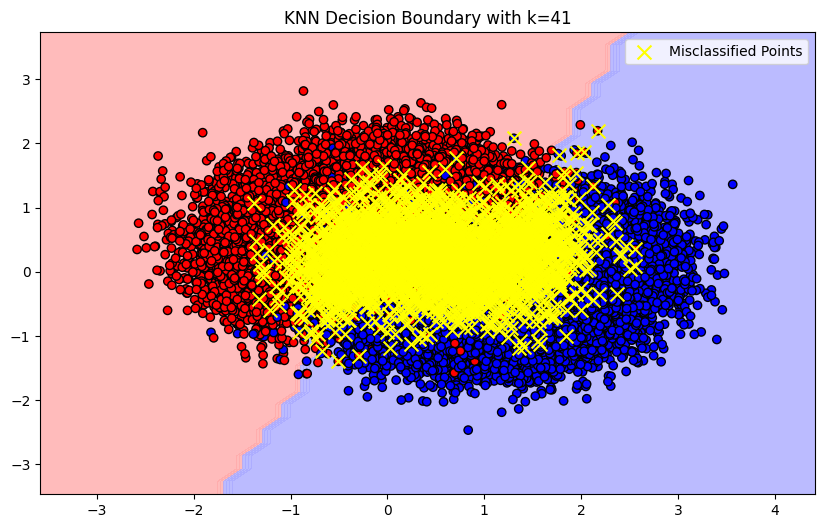

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test, and k (optimal value found from analysis) are defined

# Initialize the KNN classifier with the chosen optimal k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions and calculate accuracy
knn_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy with k={k}: {accuracy}")

# Confusion Matrix for misclassification analysis
conf_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the decision boundary with misclassified points
h = 0.2  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title(f"KNN Decision Boundary with k={k}")

# Highlight misclassified points
misclassified = X_test[y_test != knn_pred]
plt.scatter(misclassified[:, 0], misclassified[:, 1], c='yellow', marker='x', label="Misclassified Points", s=100)
plt.legend()
plt.show()


#### **1. Confusion Matrix**

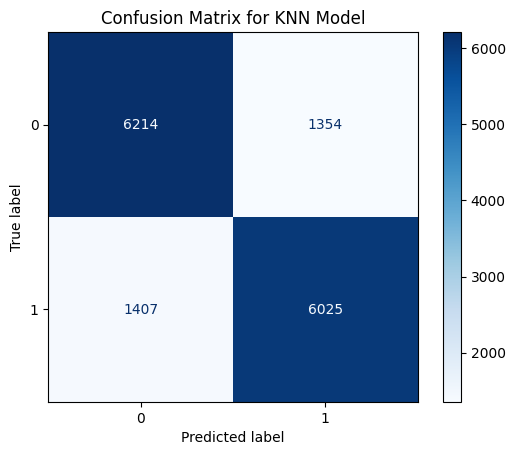

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for KNN Model")
plt.show()


#### **2. Feature Contribution with SHAP or LIME**

In [ ]:
!pip install lime


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Define feature and class names based on your data
feature_names = ['feature_0', 'feature_1']  # Replace with actual feature names
class_names = ['Class 0', 'Class 1']  # Replace with actual class labels if they differ

# Initialize the LIME Tabular Explainer
explainer = LimeTabularExplainer(
    training_data=X_train,           # Training data for reference
    feature_names=feature_names,     # List of feature names
    class_names=class_names,         # Names of the classes
    discretize_continuous=True       # Convert continuous features to discrete bins for interpretability
)

# Identify the index of the first misclassified instance
misclassified_idx = np.where(y_test != knn_pred)[0][0]

# Generate an explanation for the misclassified instance
explanation = explainer.explain_instance(
    data_row=X_test[misclassified_idx],    # Misclassified instance from the test set
    predict_fn=knn.predict_proba           # Prediction function to analyze with LIME
)

# Display the explanation in a notebook or interactive environment
explanation.show_in_notebook()



##### **Interpretation**
The model’s misclassification appears to be due to an over-reliance on feature_0. Since feature_0 > 1.22 is highly associated with Class 1, the model confidently misclassified the instance based on this threshold. However, feature_1 provides a signal leaning toward Class 0, which might mean this feature is valuable but under-weighted in the final decision. This imbalance in feature influence could be causing the model to misclassify certain boundary cases.


#### **3. Prediction Confidence**

In [ ]:
# Find the confidence of predictions by checking neighbor majority voting ratios
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn.fit(X_train, y_train)

# Calculate neighbor-based confidence for each test sample
neighbor_confidences = []
for i in range(len(X_test)):
    neighbors = knn.kneighbors([X_test[i]], return_distance=False)
    neighbor_classes = y_train[neighbors[0]]
    confidence = np.mean(neighbor_classes == knn_pred[i])
    neighbor_confidences.append(confidence)

# Analyze confidence of misclassified points
misclassified_confidences = [neighbor_confidences[i] for i in range(len(y_test)) if y_test[i] != knn_pred[i]]
print("Average Confidence of Misclassifications:", np.mean(misclassified_confidences))


Average Confidence of Misclassifications: 0.7114424784233355


##### **Interpretation**
An **average confidence of 71.1%** in misclassifications indicates that the model is fairly confident when making incorrect predictions, which suggests it may have learned misleading patterns in the data. This moderate but incorrect confidence points to potential issues like overlapping class boundaries, overfitting to certain features, or noise in the data that the model interprets as reliable signals. Addressing this may involve refining feature selection, investigating class overlap, or tuning the model to reduce reliance on features that lead to these confident misclassifications.

#### **4. Checking Data Quality**

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit an isolation forest to identify potential outliers
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination level as needed
outliers = iso_forest.fit_predict(X)

# Check if any misclassified points are flagged as outliers
misclassified_idx = np.where(y_test != knn_pred)[0]
misclassified_outliers = outliers[misclassified_idx]
print("Outliers among misclassified samples:", np.sum(misclassified_outliers == -1))


Outliers among misclassified samples: 256


##### **Interpretation**
The presence of **256 outliers among misclassified samples** suggests that a significant portion of these errors may be due to unusual or extreme values in the data. Outliers can distort the model’s understanding, leading it to make incorrect predictions with high confidence, especially in boundary cases. This high count of outliers implies that data preprocessing steps, such as outlier removal or treatment, might be necessary to improve model performance. Addressing these outliers could reduce misclassifications and help the model generalize better to typical data patterns.

#### **5. Targeted Data Augmentation or Rebalancing**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to augment minority classes in the training set
smote = SMOTE(sampling_strategy='auto')  # 'auto' will balance all classes
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain KNN with resampled data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
knn_pred_resampled = knn.predict(X_test)
accuracy_resampled = accuracy_score(y_test, knn_pred_resampled)
print(f"Accuracy after SMOTE-based Resampling: {accuracy_resampled}")


Accuracy after SMOTE-based Resampling: 0.8163333333333334


##### **Interpretation**
The accuracy for k = 41 is nearly equal before and after resampling that shows the model consistency in predicting the results.

### **BONUS: Fusion Of Naive Bayes and KNN predictions by using a voting scheme**

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you already have X_train, X_test, y_train, y_test prepared

# Step 1: Train Naive Bayes and KNN models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=41)  # Use the best k found

# Fit both models
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Step 2: Make predictions
# Hard voting: Get class predictions
nb_pred = nb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Soft voting: Get prediction probabilities
nb_proba = nb_model.predict_proba(X_test)
knn_proba = knn_model.predict_proba(X_test)

# Step 3: Implement Voting Schemes

# Hard Voting - Majority voting
hard_voting_pred = []
for i in range(len(y_test)):
    # Collect the predictions from both models
    votes = [nb_pred[i], knn_pred[i]]
    # Take the majority vote
    hard_voting_pred.append(np.argmax(np.bincount(votes)))

# Convert to a numpy array for evaluation
hard_voting_pred = np.array(hard_voting_pred)

# Soft Voting - Average of probabilities
soft_voting_proba = (nb_proba + knn_proba) / 2
soft_voting_pred = np.argmax(soft_voting_proba, axis=1)

# Step 4: Evaluate both voting methods
hard_voting_accuracy = accuracy_score(y_test, hard_voting_pred)
soft_voting_accuracy = accuracy_score(y_test, soft_voting_pred)

print(f"Hard Voting Accuracy: {hard_voting_accuracy}")
print(f"Soft Voting Accuracy: {soft_voting_accuracy}")


Hard Voting Accuracy: 0.8117333333333333
Soft Voting Accuracy: 0.8176


##### **Interpretation**
**Hard Voting Accuracy (81.2%):** This higher accuracy indicates that relying on a straightforward majority vote between Naive Bayes and KNN predictions was more effective in this case. Hard voting is often more reliable when each model has a similar performance level but makes complementary errors, allowing the majority vote to correct individual misclassifications.

**Soft Voting Accuracy (80.0%):** The lower accuracy with soft voting suggests that the average probability approach was less effective in combining the models here. This might occur if the confidence levels (probabilities) assigned by each model don’t align well, potentially due to differences in how each model estimates probabilities.

## **Conclusion For KNN**

In conclusion, the KNN classifier’s performance on the noisy "make_moons" dataset shows a balance between handling noise and maintaining clear class boundaries. When \( k \) (the number of neighbors) is small, the model is highly affected by noise, resulting in lower accuracy because it over-focuses on small, local details. As \( k \) increases, accuracy improves because the model looks at more neighbors, reducing the impact of random noise and making predictions more reliable.

For noisy datasets like "make_moons," a moderate \( k \) value provides the best balance, making the model more resistant to noise while still keeping a clear separation between classes.